<a href="https://colab.research.google.com/github/mari-ana-116/python-pandas/blob/main/Segundo_Exemplo_em_Python_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Segundo exemplo de manipulação de dados usando Python Pandas**

Veremos inserção de dados, remoção de colunas, merge e gráficos.

Autora: Mariana Cerqueira Dias Santos

Data: 9-10/02/23

In [1]:
# Importando biblioteca Pandas no Python
import pandas as pd

In [2]:
combustiveis_df = pd.read_excel("ca-2021-02.xlsx")
display(combustiveis_df.head())

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,GASOLINA,2021-11-01,6.799,NaN,R$ / litro,VIBRA ENERGIA
1,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,ETANOL,2021-11-01,5.299,NaN,R$ / litro,VIBRA ENERGIA
2,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,DIESEL,2021-11-01,5.549,NaN,R$ / litro,VIBRA ENERGIA
3,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,GASOLINA ADITIVADA,2021-11-01,6.899,NaN,R$ / litro,VIBRA ENERGIA
4,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,DIESEL S10,2021-11-01,5.649,NaN,R$ / litro,VIBRA ENERGIA


In [3]:
# Inserção simples de dado em todas as linhas
combustiveis_df['Ativo'] = True

display(combustiveis_df.head())

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Ativo
0,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,GASOLINA,2021-11-01,6.799,NaN,R$ / litro,VIBRA ENERGIA,True
1,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,ETANOL,2021-11-01,5.299,NaN,R$ / litro,VIBRA ENERGIA,True
2,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,DIESEL,2021-11-01,5.549,NaN,R$ / litro,VIBRA ENERGIA,True
3,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,GASOLINA ADITIVADA,2021-11-01,6.899,NaN,R$ / litro,VIBRA ENERGIA,True
4,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,DIESEL S10,2021-11-01,5.649,NaN,R$ / litro,VIBRA ENERGIA,True


In [4]:
# Criar uma coluna "Obs" que tenha nela escrito "MELHOR CIDADE" quando a coluna 'Municipio' for igual a SÃO PAULO, INDAIATUBA, CAMPINAS E SALTO
combustiveis_df['Obs'] = ["MELHOR CIDADE" if municipio == 'SAO PAULO' else '' for municipio in combustiveis_df['Municipio']]
display(combustiveis_df.loc[combustiveis_df['Municipio'].isin(['SAO PAULO','INDAIATUBA', 'CAMPINAS', 'SALTO']), ['Municipio', 'Obs']])

,Municipio,Obs
1601,SAO PAULO,MELHOR CIDADE
1602,SAO PAULO,MELHOR CIDADE
1603,SAO PAULO,MELHOR CIDADE
1604,SAO PAULO,MELHOR CIDADE
2607,CAMPINAS,
...,...,...
165925,SAO PAULO,MELHOR CIDADE
165926,SAO PAULO,MELHOR CIDADE
166122,SAO PAULO,MELHOR CIDADE
166123,SAO PAULO,MELHOR CIDADE


In [5]:
# Como preencher uma coluna 'Valor de Venda - Status' que verifica 
# se o valor de venda for maior que 6,5 reais, ele fala que está caro
# caso contrário, está barato

import numpy as np

combustiveis_df['Status do Valor de Venda'] = np.where(combustiveis_df['Valor de Venda'] > 6.5, 'Caro', 'Barato')
display(combustiveis_df[['Revenda', 'Valor de Venda', 'Status do Valor de Venda']])

,Revenda,Valor de Venda,Status do Valor de Venda
0,POSTO ARAPIRACA LTDA,6.799,Caro
1,POSTO ARAPIRACA LTDA,5.299,Barato
2,POSTO ARAPIRACA LTDA,5.549,Barato
3,POSTO ARAPIRACA LTDA,6.899,Caro
4,POSTO ARAPIRACA LTDA,5.649,Barato
...,...,...,...
168404,COMERCIAL DE COMBUSTIVEL CACHOEIRINHA LTDA,5.859,Barato
168405,ABC DISTRIBUICAO DE PETROLEO LTDA,6.580,Caro
168406,ABC DISTRIBUICAO DE PETROLEO LTDA,4.740,Barato
168407,ABC DISTRIBUICAO DE PETROLEO LTDA,5.448,Barato


In [6]:
# Calcular postos de gasolina por habitantes temos na amostragem de combustíveis em novembro de 2021
# O número de habitantes não existe nesse dataframe, então utilizaremos outra base de dados com a estimativa desses números feitas belo IBGE em 2021
num_habitantes_df = pd.read_csv("ibge_num_habitantes_estimado.csv", sep=";")

# Precisamos renomear a coluna "Estado" para "Estado - Sigla" para não haver discrepâncias no cruzamento de dados entre daataframes mais tarde
num_habitantes_df.rename(columns={"Estado":"Estado - Sigla"}, inplace=True)
display(num_habitantes_df)

,Municipio,Estado - Sigla,NumHabitantes2021
0,BELO HORIZONTE,MG,2530701
1,CAMPINAS,SP,1223237
2,CAMPO GRANDE,MS,916001
3,CURITIBA,PR,1963726
4,GOIANIA,GO,1555626
5,INDAIATUBA,SP,260690
6,NATAL,RN,803739
7,PALMAS,TO,313349
8,PENAPOLIS,SP,64098
9,PORTO ALEGRE,RS,1492530


In [7]:
# Para fazer o cruzamento entre dados dos dataframes, utilizaremos um MERGE
colunas = ['Municipio', 'Estado - Sigla']
merge_df = combustiveis_df.merge(num_habitantes_df, how="inner", on=colunas)
display(merge_df)
print(merge_df.info())

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Ativo,Obs,Status do Valor de Venda,NumHabitantes2021
0,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA,2021-11-01,6.999,NaN,R$ / litro,RAIZEN,True,,Caro,1555626
1,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,ETANOL,2021-11-01,4.990,NaN,R$ / litro,RAIZEN,True,,Barato,1555626
2,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA ADITIVADA,2021-11-01,7.130,NaN,R$ / litro,RAIZEN,True,,Caro,1555626
3,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,GASOLINA,2021-11-01,6.990,NaN,R$ / litro,BRANCA,True,,Caro,1555626
4,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,ETANOL,2021-11-01,4.990,NaN,R$ / litro,BRANCA,True,,Barato,1555626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20629,SE,SP,INDAIATUBA,POSTO DOS ESTEVES LTDA,20.763.169/0001-00,AVENIDA ITORORO,160,NaN,CENTRO,13330-055,GASOLINA,2021-12-28,6.499,NaN,R$ / litro,IPIRANGA,True,,Barato,260690
20630,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,DIESEL S10,2021-12-28,5.499,NaN,R$ / litro,RAIZEN,True,,Barato,260690
20631,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,GASOLINA ADITIVADA,2021-12-28,6.699,NaN,R$ / litro,RAIZEN,True,,Caro,260690
20632,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,ETANOL,2021-12-28,4.899,NaN,R$ / litro,RAIZEN,True,,Barato,260690


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 0 to 20633
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Regiao - Sigla            20634 non-null  object        
 1   Estado - Sigla            20634 non-null  object        
 2   Municipio                 20634 non-null  object        
 3   Revenda                   20634 non-null  object        
 4   CNPJ da Revenda           20634 non-null  object        
 5   Nome da Rua               20634 non-null  object        
 6   Numero Rua                20634 non-null  object        
 7   Complemento               3837 non-null   object        
 8   Bairro                    20634 non-null  object        
 9   Cep                       20634 non-null  object        
 10  Produto                   20634 non-null  object        
 11  Data da Coleta            20634 non-null  datetime64[ns]
 12  Valor de Venda    

In [8]:
# Destruição de linhas duplicadas com drop_duplicates
# merge_df.drop_duplicates()

# Destruição de coluna vazia (todas as linhas são nulas)
merge_df.dropna(axis='columns', inplace=True)
print(merge_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 0 to 20633
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Regiao - Sigla            20634 non-null  object        
 1   Estado - Sigla            20634 non-null  object        
 2   Municipio                 20634 non-null  object        
 3   Revenda                   20634 non-null  object        
 4   CNPJ da Revenda           20634 non-null  object        
 5   Nome da Rua               20634 non-null  object        
 6   Numero Rua                20634 non-null  object        
 7   Bairro                    20634 non-null  object        
 8   Cep                       20634 non-null  object        
 9   Produto                   20634 non-null  object        
 10  Data da Coleta            20634 non-null  datetime64[ns]
 11  Valor de Venda            20634 non-null  float64       
 12  Unidade de Medida 

In [12]:
colunas = ['Regiao - Sigla', 'Nome da Rua', 'Numero Rua', 'Bairro', 'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Unidade de Medida', 'Bandeira', 'Ativo', 'Status do Valor de Venda']
merge_df.drop(labels=colunas, axis=1, inplace=True)
print(merge_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 0 to 20633
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Estado - Sigla     20634 non-null  object
 1   Municipio          20634 non-null  object
 2   Revenda            20634 non-null  object
 3   CNPJ da Revenda    20634 non-null  object
 4   Obs                20634 non-null  object
 5   NumHabitantes2021  20634 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.1+ MB
None


In [11]:
# Remover as linhas duplicadas
merge_df.drop_duplicates(inplace=True)
display(merge_df.head(100))

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira,Ativo,Obs,Status do Valor de Venda,NumHabitantes2021
0,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,SETOR NEGRAO DE LIMA,74650-300,GASOLINA,2021-11-01,6.999,R$ / litro,RAIZEN,True,,Caro,1555626
1,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,SETOR NEGRAO DE LIMA,74650-300,ETANOL,2021-11-01,4.990,R$ / litro,RAIZEN,True,,Barato,1555626
2,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,SETOR NEGRAO DE LIMA,74650-300,GASOLINA ADITIVADA,2021-11-01,7.130,R$ / litro,RAIZEN,True,,Caro,1555626
3,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,VILA NOVA,74645-010,GASOLINA,2021-11-01,6.990,R$ / litro,BRANCA,True,,Caro,1555626
4,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,VILA NOVA,74645-010,ETANOL,2021-11-01,4.990,R$ / litro,BRANCA,True,,Barato,1555626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,CO,GO,GOIANIA,AUTO POSTO DONA SANTA LTDA.,08.232.672/0001-34,AVENIDA T 63,1295,NOVA SUIÇA,74280-235,GASOLINA,2021-11-04,7.270,R$ / litro,BRANCA,True,,Caro,1555626
96,CO,GO,GOIANIA,AUTO POSTO DONA SANTA LTDA.,08.232.672/0001-34,AVENIDA T 63,1295,NOVA SUIÇA,74280-235,DIESEL S10,2021-11-04,5.570,R$ / litro,BRANCA,True,,Barato,1555626
97,CO,GO,GOIANIA,AUTO POSTO ANTENA 104 EIRELI,05.634.368/0001-25,RUA C 125,356,JARDIM AMERICA,74255-470,ETANOL,2021-11-04,5.150,R$ / litro,BRANCA,True,,Barato,1555626
98,CO,GO,GOIANIA,AUTO POSTO ANTENA 104 EIRELI,05.634.368/0001-25,RUA C 125,356,JARDIM AMERICA,74255-470,GASOLINA,2021-11-04,7.190,R$ / litro,BRANCA,True,,Caro,1555626


In [10]:
# Agrupar e contar quantos postos tem na cidade
postos_por_municipio_df = merge_df.groupby(by=['Estado - Sigla', 'Municipio', 'NumHabitantes2021']).count()
postos_por_municipio_df.reset_index(inplace=True)
# display(postos_por_municipio_df.info())
postos_por_municipio_df.drop('CNPJ da Revenda', axis=1, inplace=True)
postos_por_municipio_df.rename(columns={"Revenda": "NumPostos"}, inplace=True)

postos_por_municipio_df['NumHabitantesPorPosto'] = postos_por_municipio_df['NumHabitantes2021'] / postos_por_municipio_df['NumPostos']
# display(postos_por_municipio_df.info())
display(postos_por_municipio_df)


,Estado - Sigla,Municipio,NumHabitantes2021,Regiao - Sigla,NumPostos,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira,Ativo,Obs,Status do Valor de Venda,NumHabitantesPorPosto
0,AC,RIO BRANCO,419452,1090,1090,1090,1090,1090,1090,1090,1090,1090,1090,1090,1090,1090,1090,384.818349
1,GO,GOIANIA,1555626,1667,1667,1667,1667,1667,1667,1667,1667,1667,1667,1667,1667,1667,1667,933.188962
2,MG,BELO HORIZONTE,2530701,827,827,827,827,827,827,827,827,827,827,827,827,827,827,3060.097944
3,MS,CAMPO GRANDE,916001,1606,1606,1606,1606,1606,1606,1606,1606,1606,1606,1606,1606,1606,1606,570.361768
4,PR,CURITIBA,1963726,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291,1521.089078
5,RJ,RIO DE JANEIRO,6775561,2445,2445,2445,2445,2445,2445,2445,2445,2445,2445,2445,2445,2445,2445,2771.190593
6,RN,NATAL,803739,1093,1093,1093,1093,1093,1093,1093,1093,1093,1093,1093,1093,1093,1093,735.351327
7,RO,PORTO VELHO,548952,805,805,805,805,805,805,805,805,805,805,805,805,805,805,681.927950
8,RS,PORTO ALEGRE,1492530,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1306.943958
9,SP,CAMPINAS,1223237,1605,1605,1605,1605,1605,1605,1605,1605,1605,1605,1605,1605,1605,1605,762.141433


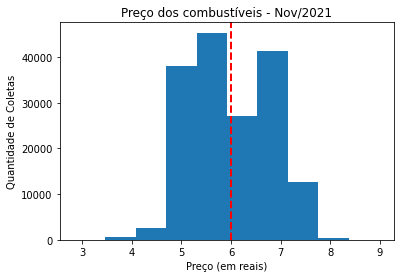

In [24]:
# Vamos fazer gráficos
import matplotlib.pyplot as plt
plt.hist(combustiveis_df['Valor de Venda'])

# Para colocar um título no gráfico
plt.title("Preço dos combustíveis - Nov/2021")

# Rótulo horizontal
plt.xlabel("Preço (em reais)")

# Rótulo vertical
plt.ylabel("Quantidade de Coletas")

# Faz a linha vermelha tracejada com o preço médio
plt.axvline(combustiveis_df['Valor de Venda'].mean(), color='red', linestyle='dashed', linewidth=2)

# Plota o gráfico
plt.show()

In [25]:
# Visualização do consumo médio
c_mean = combustiveis_df['Valor de Venda'].groupby(by=combustiveis_df['Produto']).mean()
display(c_mean)

Produto
DIESEL                5.375682
DIESEL S10            5.454901
ETANOL                5.456115
GASOLINA              6.708741
GASOLINA ADITIVADA    6.860422
GNV                   4.392935
Name: Valor de Venda, dtype: float64

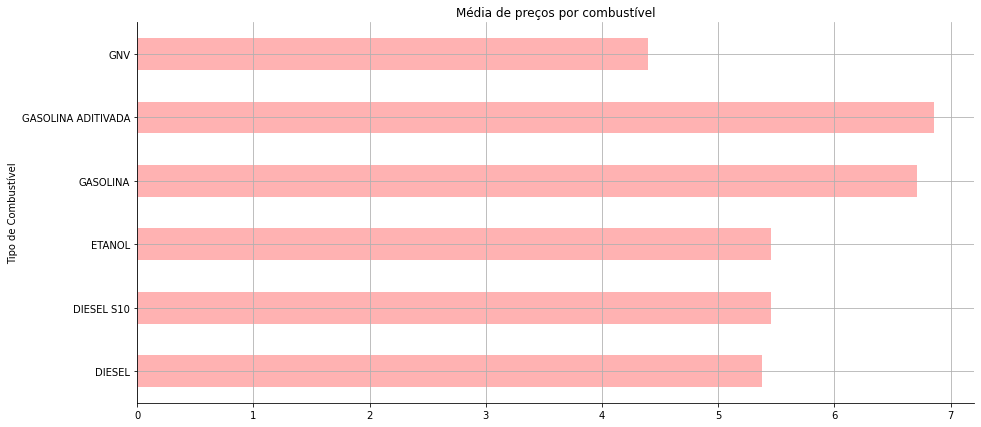

In [40]:
import seaborn as sns


# Definir a área do gráfico
plt.figure(figsize=(15,7))

# Plotar o gráfico
c_mean.plot(
    kind="barh",
    xlabel="Tipo de Combustível",
    ylabel="Preço em reais/litro",
    title="Média de preços por combustível",
    color="red",
    alpha=0.3
)

# Grid
plt.grid()

# Remover as linhas superior e lateral direita do gráfico
sns.despine()

# Exibe
plt.show()

In [53]:
# Vamos personalizar a planilha excel
from openpyxl import load_workbook
from openpyxl.styles import PatternFill, Font, Color, Alignment

# Vai abrir o Excel no openpyxl
wb = load_workbook(excel) # wb = workbook

# Pegar a planilha certa utilizando o Sheet Name
ws = wb['Sumário'] # ws = Work Sheet, que significa planilha atual, ativa, de trabalho

# Vamos pintar o cabeçalho da tabela de "cinzinha"
cinzinha = PatternFill("solid", fgColor="cccccc")
coords = ['A1', 'B1']
for coord in coords:
  ws[coord].fill = cinzinha

# Formatação condicional pintando fontes, onde o preço do combustível for >= 6,5
# reais (6.5) fica em vermelho e negrito
MAX_ROW = ws.max_row
num_linha = 2
while (num_linha <= MAX_ROW):
  coord = 'B'+str(num_linha) #coord="B{0}".format(num_linha)
  if ws[coord].value >= 6.5:
    ws[coord].font = Font(bold=True, color="FF0000")
  num_linha = num_linha + 1
  
# Salvar o Excel
wb.save(excel)

In [43]:
# c_mean.reset_index(inplace=True)
display(c_mean)

excel = "por_litro.xlsx"
c_mean.to_excel(excel, "Sumário")

Produto
DIESEL                5.375682
DIESEL S10            5.454901
ETANOL                5.456115
GASOLINA              6.708741
GASOLINA ADITIVADA    6.860422
GNV                   4.392935
Name: Valor de Venda, dtype: float64